In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.svm import SVC
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


In [2]:
mobile_train = pd.read_csv("train.csv")
y = mobile_train["price_range"]
X = mobile_train.drop("price_range", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [3]:
mobile_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<div style="text-align:right" class="alert alert-block"> در ابتدا یک سری کلاسیفایر $SVM$ با مشخصه‌های مختلف تشکیل دادیم و و کرنل خطی از همه بهتر و کرنل سیگموید از همه بدتر عمل کرد. (روی داده‌های خام)

</div>

In [4]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
print("\nSVM with Linear Kernel Accuracy:", svm_clf.score(X_test, y_test)*100)

svm_clf = SVC(C=1000)
svm_clf.fit(X_train, y_train)
print("\nSVM with C=1000 and default kernel(RBF) Accuracy:", svm_clf.score(X_test, y_test)*100)

svm_clf = SVC(kernel='rbf', gamma= 0.00001)
svm_clf.fit(X_train, y_train)
print("\nSVM with gamma= 0.00001 and default kernel(RBF) Accuracy:", svm_clf.score(X_test, y_test)*100)

svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train, y_train)
print("\nSVM with Sigmoid Kernel Accuracy:", svm_clf.score(X_test, y_test)*100)


svm_clf = SVC(kernel='sigmoid',C=0.08)
svm_clf.fit(X_train, y_train)
print("\nSVM with C=0.08 and Sigmoid Kernel Accuracy:", svm_clf.score(X_test, y_test)*100)

svm_clf = SVC(kernel='poly', degree=5)
svm_clf.fit(X_train, y_train)
print("\nSVM with Polynomial(degree=5) Kernel Accuracy:", svm_clf.score(X_test, y_test)*100)



SVM with Linear Kernel Accuracy: 96.36363636363636

SVM with C=1000 and default kernel(RBF) Accuracy: 95.9090909090909

SVM with gamma= 0.00001 and default kernel(RBF) Accuracy: 92.42424242424242

SVM with Sigmoid Kernel Accuracy: 20.757575757575758

SVM with C=0.08 and Sigmoid Kernel Accuracy: 26.060606060606062

SVM with Polynomial(degree=5) Kernel Accuracy: 93.63636363636364


### Margins
-------------------------------------------------------------------------------------------------------------------------------
<div style="text-align:right" class="alert alert-block">
    نوع مارجین (سخت یا نرم) با توجه به مقدار پارامتر $C$ کنترل میشود. مقدار بزرگتر به ما مارجین سخت تری میدهد. همانطور که دقت ها نشان داده اند، درمورد کرنل سیگموید که بطورکلی عملکرد خوبی برای ما نداشت، مارجین نرم به ما دقت بهتری داد ولی درباره کرنل $RBF$ مارجین سخت ۵ درصد افزایش دقت را به ما داد</div>


In [5]:
svm_clf = SVC(kernel='sigmoid',C=0.08)
svm_clf.fit(X_train, y_train)
print("Soft Margin(sigmoid kernel) Accuracy:", svm_clf.score(X_test, y_test)*100)

svm_clf = SVC(kernel='sigmoid',C=1000)
svm_clf.fit(X_train, y_train)
print("Hard Margin(sigmoid kernel) Accuracy:", svm_clf.score(X_test, y_test)*100)

#another kernel
svm_clf = SVC(C=0.08)
svm_clf.fit(X_train, y_train)
print("\nSoft Margin(RBF Kernel) Accuracy:", svm_clf.score(X_test, y_test)*100)

svm_clf = SVC(C=1000)
svm_clf.fit(X_train, y_train)
print("Hard Margin(RBF Kernel) Accuracy:", svm_clf.score(X_test, y_test)*100)

Soft Margin(sigmoid kernel) Accuracy: 26.060606060606062
Hard Margin(sigmoid kernel) Accuracy: 19.242424242424242

Soft Margin(RBF Kernel) Accuracy: 90.45454545454545
Hard Margin(RBF Kernel) Accuracy: 95.9090909090909


### Binning
-------------------------------------------------------------------------------------------------------------------------------    

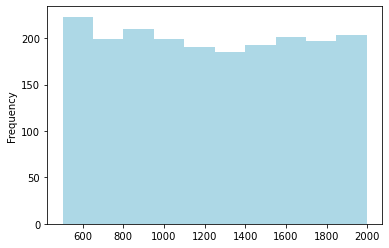

In [6]:
mobile_train_binned = deepcopy(mobile_train)
mobile_train.battery_power.plot(kind='hist', color='lightblue');
bins = [500,800,1000,1200,1400,1600,1800,2000]
labels = [0,1,2,3,4,5,6]
mobile_train_binned['binned_btpower1'] = pd.cut(mobile_train.battery_power, bins=bins, labels=labels)

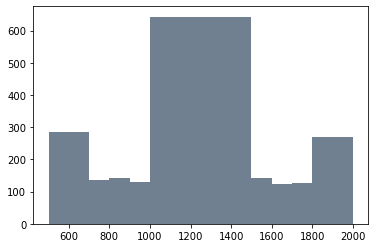

In [7]:
bins_list = [500, 700, 800, 900, 1000, 1500,1600,1700,1800,2000]
plt.hist(mobile_train.battery_power, bins=bins_list, color='slategrey');
labels = [0,1,2,3,4,5,6,7,8]
mobile_train_binned['binned_btpower2'] = pd.cut(mobile_train.battery_power, bins=bins_list, labels=labels)

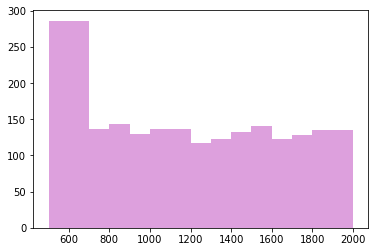

In [8]:
bins_list = [500, 700, 800, 900, 1000, 1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
plt.hist(mobile_train.battery_power, bins=bins_list, color='plum');
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
mobile_train_binned['binned_btpower3'] = pd.cut(mobile_train.battery_power, bins=bins_list, labels=labels)

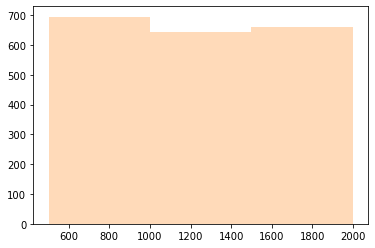

In [9]:
bins_list = [500, 1000, 1500, 2000]
plt.hist(mobile_train.battery_power, bins=bins_list, color='peachpuff');
labels = [0,1,2]
mobile_train_binned['binned_btpower4'] = pd.cut(mobile_train.battery_power, bins=bins_list, labels=labels)

In [10]:
mobile_train_binned

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,binned_btpower1,binned_btpower2,binned_btpower3,binned_btpower4
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,1,1,2,2,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,2,2,4,4,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,2,0,0,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,2,0,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,1,6,8,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,4,19,1,1,0,0,0,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,10,16,1,1,1,2,6,8,13,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1,5,1,1,0,3,6,8,13,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,10,19,1,1,1,0,4,5,9,2


In [11]:
y = mobile_train_binned["price_range"]
X = mobile_train_binned.drop(["price_range","battery_power"], axis = 1)
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train_binned, y_train_binned)
print("Binned battery_power Data Accuracy:", svm_clf.score(X_test_binned, y_test_binned)*100)

Binned battery_power Data Accuracy: 93.03030303030303


<div style="text-align:right" class="alert alert-block">
    مشاهده میشود که استفاده از این روش، از پیچیدگی محاسباتی برای ما کم کرد ولی با کاهش دقت ( به مقدار ناچیزی) همراه بود
</div>

### One Hot Encoding
-------------------------------------------------------------------------------------------------------------------------------
<div style="text-align:right" class="alert alert-block">
    این روش به ما این امکان را میدهد که فیچرهایی که بصورت کتگوریکال هستند را به شکل یک لیست باینری تحویل بگیریم و بتوانیم بعنوان ورودی کلاسبندها بدهیم
    </div>

In [12]:
catg_col= ['dual_sim', 'blue', 'four_g', 'wifi', 'touch_screen', 'three_g']
enc = OneHotEncoder()
one_hot_encode_table = pd.DataFrame(enc.fit_transform(mobile_train[catg_col]).toarray())
mobile_train_temp = mobile_train.drop(catg_col, axis=1 )
mobile_train_ohe = mobile_train_temp.join(one_hot_encode_table)
mobile_train_ohe

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,2,3,4,5,6,7,8,9,10,11
0,842,2.2,1,7,0.6,188,2,2,20,756,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1998,1512,0.9,4,46,0.1,145,5,5,336,670,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [13]:
y = mobile_train_ohe["price_range"]
X = mobile_train_ohe.drop("price_range", axis = 1)
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train_ohe, y_train_ohe)
print("One-hot-encoded Data Accuracy:", svm_clf.score(X_test_ohe, y_test_ohe)*100)

One-hot-encoded Data Accuracy: 96.21212121212122


### Transforms
-------------------------------------------------------------------------------------------------------------------------------
<div style="text-align:right" class="alert alert-block">
  تبدیلات به ما کمک میکنند که بردارهای خام فیچرها را به‌صورت یک نمایش خاصی دربیاوریم که برای تخمینگرها (دراینجا طبقه بندها) مناسب باشند. بعنوان مثال یکی از تبدیلات در راستای نرمال‌سازی داده‌ها انجام میگیرد. همانطورکه دیده میشود، پس از اجرای تبدیل نرمالساز، کرنل سیگموید که به ما نتیجه مطلوبی نمیداد، دقت بسیار بالایی خواهد داد! این موضوع اهمیت اجرای تبدیل مناسب برروی داده ها را نشان میدهد 
    </div>

In [14]:
X_train_log_transformed = X_train.applymap(np.log2)
X_train_log_transformed

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
97,10.701306,0.0,-1.000000,-inf,1.584963,0.0,5.906891,-2.321928,7.599913,2.584963,4.169925,10.618386,10.717676,10.644758,4.169925,4.087463,3.807355,0.0,-inf,-inf
1274,10.645658,-inf,1.432959,-inf,2.000000,0.0,5.523562,-0.736966,6.882643,0.000000,2.321928,8.092757,10.052568,10.862637,4.000000,3.169925,1.000000,0.0,-inf,0.0
233,10.493855,-inf,0.000000,0.0,-inf,-inf,4.754888,-3.321928,7.584963,1.584963,4.247928,7.851749,9.424166,11.120886,2.584963,2.321928,4.321928,0.0,0.0,-inf
1312,10.157347,0.0,0.137504,-inf,-inf,0.0,2.584963,-1.000000,7.629357,2.000000,-inf,9.529431,10.786270,10.314017,4.247928,-inf,2.584963,0.0,-inf,-inf
1323,9.475733,-inf,-1.000000,-inf,2.584963,-inf,4.754888,-1.000000,6.426265,1.000000,3.459432,10.281930,10.354249,10.966505,3.459432,3.321928,3.584963,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,10.667999,-inf,-0.152003,0.0,3.169925,0.0,5.000000,-3.321928,7.491853,2.584963,4.000000,5.700440,10.079485,11.646559,3.584963,2.584963,4.000000,0.0,0.0,-inf
1197,10.140830,0.0,1.485427,0.0,-inf,-inf,5.614710,-1.000000,7.531381,1.000000,1.000000,10.063395,10.075479,10.858758,3.000000,2.000000,2.321928,0.0,0.0,0.0
753,10.962896,-inf,1.321928,-inf,2.321928,0.0,5.672425,-1.321928,6.930737,2.000000,3.169925,9.390169,10.496854,11.126704,3.000000,2.807355,3.584963,0.0,-inf,0.0
1443,10.204571,0.0,1.321928,-inf,-inf,0.0,4.754888,-3.321928,6.491853,2.584963,0.000000,7.392317,9.076816,8.442943,2.807355,2.321928,4.247928,0.0,0.0,0.0


<div style="text-align:right" class="alert alert-block">
همانطور که دیده میشود چون مقادیر زیادی وجود دارند که در دیتای ما نزدیک به صفر هستند بنابراین استفاده از تبدیل لگاریتم به ما مقدار منهای بی نهایت میدهد که این مقدار برای ورودی طبقه بند ناخوشایند است.
</div>

In [15]:
X_train_exp_transformed = X_train.applymap(np.exp2)
X_train_exp_transformed

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
97,inf,2.0,1.414214,1.0,8.0,2.0,1.152922e+18,1.148698,2.510841e+58,64.0,262144.0,inf,inf,inf,262144.0,131072.0,16384.0,2.0,1.0,1.0
1274,inf,1.0,6.498019,1.0,16.0,2.0,7.036874e+13,1.515717,3.323070e+35,2.0,32.0,1.517710e+82,inf,inf,65536.0,512.0,4.0,2.0,1.0,2.0
233,inf,1.0,2.000000,2.0,1.0,1.0,1.342177e+08,1.071773,6.277102e+57,8.0,524288.0,3.450873e+69,6.421064e+206,inf,64.0,32.0,1048576.0,2.0,2.0,1.0
1312,inf,2.0,2.143547,1.0,1.0,2.0,6.400000e+01,1.414214,4.017345e+59,16.0,1.0,2.891790e+222,inf,inf,524288.0,1.0,64.0,2.0,1.0,1.0
1323,2.154552e+214,1.0,1.414214,1.0,64.0,1.0,1.342177e+08,1.414214,7.737125e+25,4.0,2048.0,inf,inf,inf,2048.0,1024.0,4096.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,inf,1.0,1.866066,2.0,512.0,2.0,4.294967e+09,1.071773,1.532496e+54,64.0,65536.0,4.503600e+15,inf,inf,4096.0,64.0,65536.0,2.0,2.0,1.0
1197,inf,2.0,6.964405,2.0,1.0,1.0,5.629500e+14,1.414214,4.903986e+55,4.0,4.0,inf,inf,inf,256.0,16.0,32.0,2.0,2.0,2.0
753,inf,1.0,5.656854,1.0,32.0,2.0,2.251800e+15,1.319508,5.316912e+36,16.0,512.0,9.797767e+201,inf,inf,256.0,128.0,4096.0,2.0,1.0,2.0
1443,inf,2.0,5.656854,1.0,1.0,2.0,1.342177e+08,1.071773,1.237940e+27,64.0,2.0,3.741444e+50,3.599131e+162,5.733747e+104,128.0,32.0,524288.0,2.0,2.0,2.0


<div style="text-align:right" class="alert alert-block">
همینطور برای تبدیل مقادیر بصورت نمایی نیز چون اعداد توان میشوند، مقادیر بعضی از ستونها به سمت مثبت بی نهایت میل میکند و استفاده از این تبدیل نیز مناسب نیست. پیشنهاد ما استفاده از یک تبدیل نرمالساز استاندارد است. همانطور که جلوتر پیاده سازی و استفاده شده است
</div>

In [16]:
def standardise_data(X_train, X_test):
    sc = StandardScaler() 
    sc.fit(X_train)
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    return train_std, test_std

svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train, y_train)
print("Non-transformed Data Accuracy:", svm_clf.score(X_test, y_test)*100)

X_train_std, X_test_std = standardise_data(X_train, X_test)
svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train_std, y_train)
print("Transformed Data Accuracy:", svm_clf.score(X_test_std, y_test)*100)

Non-transformed Data Accuracy: 20.757575757575758
Transformed Data Accuracy: 90.15151515151516


### Adding Feature
-------------------------------------------------------------------------------------------------------------------------------


In [17]:
mobile_train_added = deepcopy(mobile_train)
mobile_train_added["sc_area(cm^2)"] = mobile_train.sc_w*mobile_train.sc_h
mobile_train_added["sc_volume(cm^3)"] = mobile_train.sc_w*mobile_train.sc_h*mobile_train.m_dep
mobile_train_added

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_area(cm^2),sc_volume(cm^3)
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,63,37.8
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,51,35.7
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,22,19.8
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,128,102.4
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,16,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,52,41.6
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,110,22.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,9,6.3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,180,18.0


In [18]:
y = mobile_train_added["price_range"]
X = mobile_train_added.drop("price_range", axis = 1)
X_train_added, X_test_added, y_train_added, y_test_added = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train_added, y_train_added)
print("Added Feature Data Accuracy:", svm_clf.score(X_test_added, y_test_added)*100)

Added Feature Data Accuracy: 96.36363636363636


<div style="text-align:right" class="alert alert-block">
همانطور که دیده میشود، مقدار دقت با افزودن فیچر افزوده نشد( گاها ممکن است حتی کمتر شود!) به این دلیل که، فیچری که اضافه شد وابستگی زیادی به فیچرهای قبلی دارد و از ترکیب آنها ایجاد شده است(حجم یا مساحت) و به ما اطلاعات جدیدی نمیدهد و فقط بر پیچیدگی فضای داده میافزاید
    </div>

<div style="text-align:right" class="alert alert-block">
درقسمت آخر می خواهیم ببینیم که اثر راهکارهای داده شده به صورت کلی چه میزان دقت را بالا میببرد. در قسمت های قبلی این اثر را بصورت تفکیک شده و جداگانه برای هرکدام از حالتها بررسی کردیم.
    </div>
    

In [19]:
final_mobile_train = deepcopy(mobile_train)
#adding feature
final_mobile_train["sc_area(cm^2)"] = mobile_train_added["sc_area(cm^2)"]

#one-hot encoding
final_mobile_train = final_mobile_train.join(one_hot_encode_table)
final_mobile_train = final_mobile_train.drop(catg_col, axis=1 )

#binning
final_mobile_train['binned_btpower'] = mobile_train_binned['binned_btpower4']
final_mobile_train = final_mobile_train.drop('battery_power', axis=1 )

#splitting Data
y = final_mobile_train["price_range"]
X = final_mobile_train.drop("price_range", axis = 1)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#transforming
X_train_std_final, X_test_std_final = standardise_data(X_train_final, X_test_final)
svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train_std, y_train_final)
print("Final Data Accuracy:", svm_clf.score(X_test_std, y_test_final)*100)

Final Data Accuracy: 95.15151515151516


### Decision Tree
-------------------------------------------------------------------------------------------------------------------------------

<div style="text-align:right" class="alert alert-block">
این کتابخانه از الگوریتم $CART$ برای پیاده سازی درخت تصمیم استفاده کرده است و نتیجه پیاده سازی مدل را در باکس بعدی می بینید
    </div>

In [20]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_std, y_train)
print("Decision Tree Accuracy:", dt_clf.score(X_test_std, y_test)*100)

Decision Tree Accuracy: 80.3030303030303


<div style="text-align:right" class="alert alert-block">
در دوقسمت بعدی تاثیر عمق درخت و تعداد نمونه های موجود در هر گره، میزان افزایش یا کاهش دقت پیش بینی روی مجموعه تست را نشان داده ایم
    </div>

In [21]:
#depth

dt_clf = DecisionTreeClassifier(random_state=1, max_depth=2)
dt_clf.fit(X_train_std, y_train)
print("accuracy with depth=2 :", dt_clf.score(X_test_std, y_test)*100)

dt_clf = DecisionTreeClassifier(random_state=1, max_depth=10)
dt_clf.fit(X_train_std, y_train)
print("accuracy with depth=10 :", dt_clf.score(X_test_std, y_test)*100)

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_std, y_train)
print("accuracy with depth=None :", dt_clf.score(X_test_std, y_test)*100)

accuracy with depth=2 : 76.81818181818181
accuracy with depth=10 : 82.12121212121211
accuracy with depth=None : 80.9090909090909


In [22]:
#minimum samples in a leaf node

dt_clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
dt_clf.fit(X_train_std, y_train)
print("accuracy with minimum samples=2 :", dt_clf.score(X_test_std, y_test)*100)

dt_clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=10)
dt_clf.fit(X_train_std, y_train)
print("accuracy with minimum samples=10 :", dt_clf.score(X_test_std, y_test)*100)

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_std, y_train)
print("accuracy with minimum samples=1 :", dt_clf.score(X_test_std, y_test)*100)

accuracy with minimum samples=2 : 80.45454545454545
accuracy with minimum samples=10 : 84.24242424242424
accuracy with minimum samples=1 : 80.9090909090909


### pruning:
-------------------------------------------------------------------------------------------------------------------------------
<div style="text-align:right" class="alert alert-block">
    هرس کردن، توانایی یک درخت را برای تصمیم‌گیری در جهت داده های دیده نشده بالا میبرد و آنرا جنرالتر میکند.
    الگوریتم $Minimal-cost-complexity-pruning$ الگوریتمی برای هرس کردن درخت است که از اورفیت شدن مدل روی داده های آموزش جلوگیری میکند (در مدلهای پیچیده). از طرفی هرس کردن درخت به صورت وزن دار به ما کمک میکند که بایاس به سمت کلاسهای غالب(کلاس با داده های بیشتر) را کم کنیم 
</div>
<div style="text-align:right" class="alert alert-block">
    در بخش امتیازی از ما خواسته شده که این عملیات هرس کردن را روی داده های انجام داده و تحلیل کنیم. برای این کار، ما از الگوریتم یاد شده استفاده کردیم. در این الگوریتم یک پارامتر آلفا وجود دارد که باید آن را تنظیم کنیم. به همین منظور ابتدا مقدار ناخالصی های برگ های درخت را برحسب میزان آلفا رسم کردیم.سپس از روی لیست آلفاهایی که در این مرحله بدست آوردیم، یکسری کلاسیفایر درست میکنیم و برای هرکدام از کلاسیفایرها تعداد نود و عمق را با مقدار آلفا مقایسه کردیم تا بهینه ترین حالت را پیدا کنیم. در نهایت نیز الگوی تغییر مقدار دقت روی مجموعه های آموزش و تست را برحسب تغییر مقدار پارامتر آلفا رسم کردیم
</div>

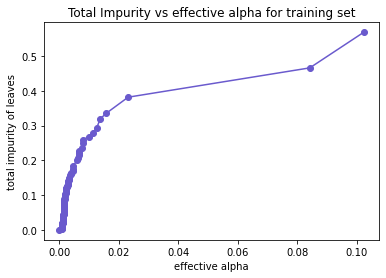

In [23]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', color='slateblue')
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18169645969470527


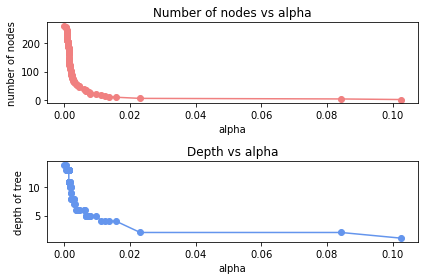

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', color='lightcoral')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', color='cornflowerblue')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

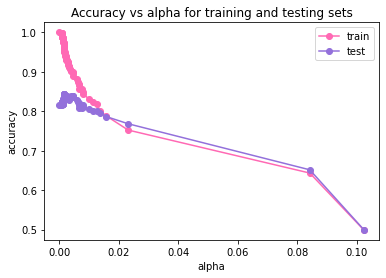

In [25]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", color= 'hotpink')
ax.plot(ccp_alphas, test_scores, marker='o', label="test", color='mediumpurple')
ax.legend()
plt.show()

### Random Forest
-------------------------------------------------------------------------------------------------------------------------------
<div style="text-align:right" class="alert alert-block">
    الگوریتم رندوم فارست به ما مقدار دقت بهتری از الگوریتم درخت تصمیم گیری میدهد چرا که این الگوریتم کلکسیونی از درخت های تصمیم گیری است و از یک تک درخت الگوریتم رباست تری به ما ارایه میدهد. این الگوریتم به دلیل اینکه از اورفیتینگ و خطای بایاس نسبت به درخت تصمیم گیری جلوگیری میکند، نتیجه بهتری به ما خواهد داد
    </div>

In [26]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_std, y_train)
print("Accuracy of Random-Forest Method:", rf_clf.score(X_test_std, y_test)*100)

Accuracy of Random-Forest Method: 88.63636363636364


In [27]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train_std, y_train)
print("Accuracy of Random-Forest Method:", rf_clf.score(X_test_std, y_test)*100)

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_std, y_train)
print("Aaccuracy of Decision-Tree Method:", dt_clf.score(X_test_std, y_test)*100)

Accuracy of Random-Forest Method: 87.87878787878788
Aaccuracy of Decision-Tree Method: 80.9090909090909
